# Training Accuracy/Loss Graphing

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
filename = 'sample_log.log'

entries = []
with open(filename) as fp:
    lines = fp.readlines()
    for idx, line in enumerate(lines[1719:]):
        split = line.split()
        entry = {}
        
        entry['date'] = ' '.join([split[0], split[1]])
#         entry['date'] = split[0]
#         entry['time'] = split[1]

        s = split[3]
        entry['gpu'] = s[0][: s.find("]")]
        entry['epoch'] = s[s.find("[") + 1 : s.rfind("]")]

        entry['batch'] = split[5][1:-1]
        if len(split) < 29:            
            entry['data'] = None
            entry['tran'] = None
            entry['F'] = None
            entry['B'] = None
            entry['O'] = None
            entry['M'] = None

            entry['train_softacc'] = split[16][14:-1] # len('Train-SoftAcc=') == 14
            entry['ans_loss'] = split[17][8:-1] # len('AnsLoss=') == 8

            entries.append(entry)
        else:
            entry['data'] = split[17]
            entry['tran'] = split[19]
            entry['F'] = split[21]
            entry['B'] = split[23]
            entry['O'] = split[25]
            entry['M'] = split[27]

            entry['train_softacc'] = split[28][14:-1] # len('Train-SoftAcc=') == 14
            entry['ans_loss'] = split[29][8:-1] # len('AnsLoss=') == 8

        entries.append(entry)

In [113]:
df = pd.DataFrame(entries)
new_dtypes = {
    'date': np.object,
    'gpu': np.int64,
    'epoch': np.int64,
    'batch': np.int64,
    'data': np.float64,
    'tran': np.float64,
    'F': np.float64,
    'B': np.float64,
    'O': np.float64,
    'M': np.float64,
    'train_softacc': np.float64,
    'ans_loss': np.float64
}
df = df.astype(new_dtypes)

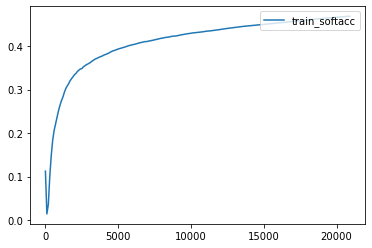

In [129]:
df1 = df[['batch', 'train_softacc', 'ans_loss']].groupby(['batch']).mean()

plt.plot(df1.index, df1['train_softacc'], label='train_softacc')
# plt.plot(df1.index, df1['ans_loss'], label='ans_loss')

plt.legend(loc='upper right')

plt.show()